<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Practice Loading and Describing Data 

_Authors: Matt Brems (DC)_

---

In this lab you will practice loading data using python and describing it with statistics.

It might be a good idea to first check the [source of the Boston housing data](https://archive.ics.uci.edu/ml/datasets/Housing).

### 1. Load the boston housing data (provided)

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('datasets/housing.csv')

### 2.  Look at an overview of your data

This overview should include, but is not limited to, checking for missing values and making sure all values make logical sense. (i.e. is one variable a percentage, but there are observations above 100%?)

Summarize your findings in a few sentences, including what you checked and, if appropriate, any 
steps you took to rectify potential integrity issues.

In [2]:
# A:
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,378.750000,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
df.dtypes

Unnamed: 0      int64
CRIM          float64
ZN            float64
INDUS         float64
CHAS            int64
NOX           float64
RM            float64
AGE           float64
DIS           float64
RAD             int64
TAX           float64
PTRATIO       float64
B             float64
LSTAT         float64
MEDV          float64
dtype: object

In [5]:
def my_func(x):
    return x.isnull().sum()

In [6]:
df.apply(lambda x: x.isnull().sum())
#df.apply(lambda x: my_func(x)) ## same result

Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
B             0
LSTAT         0
MEDV          0
dtype: int64

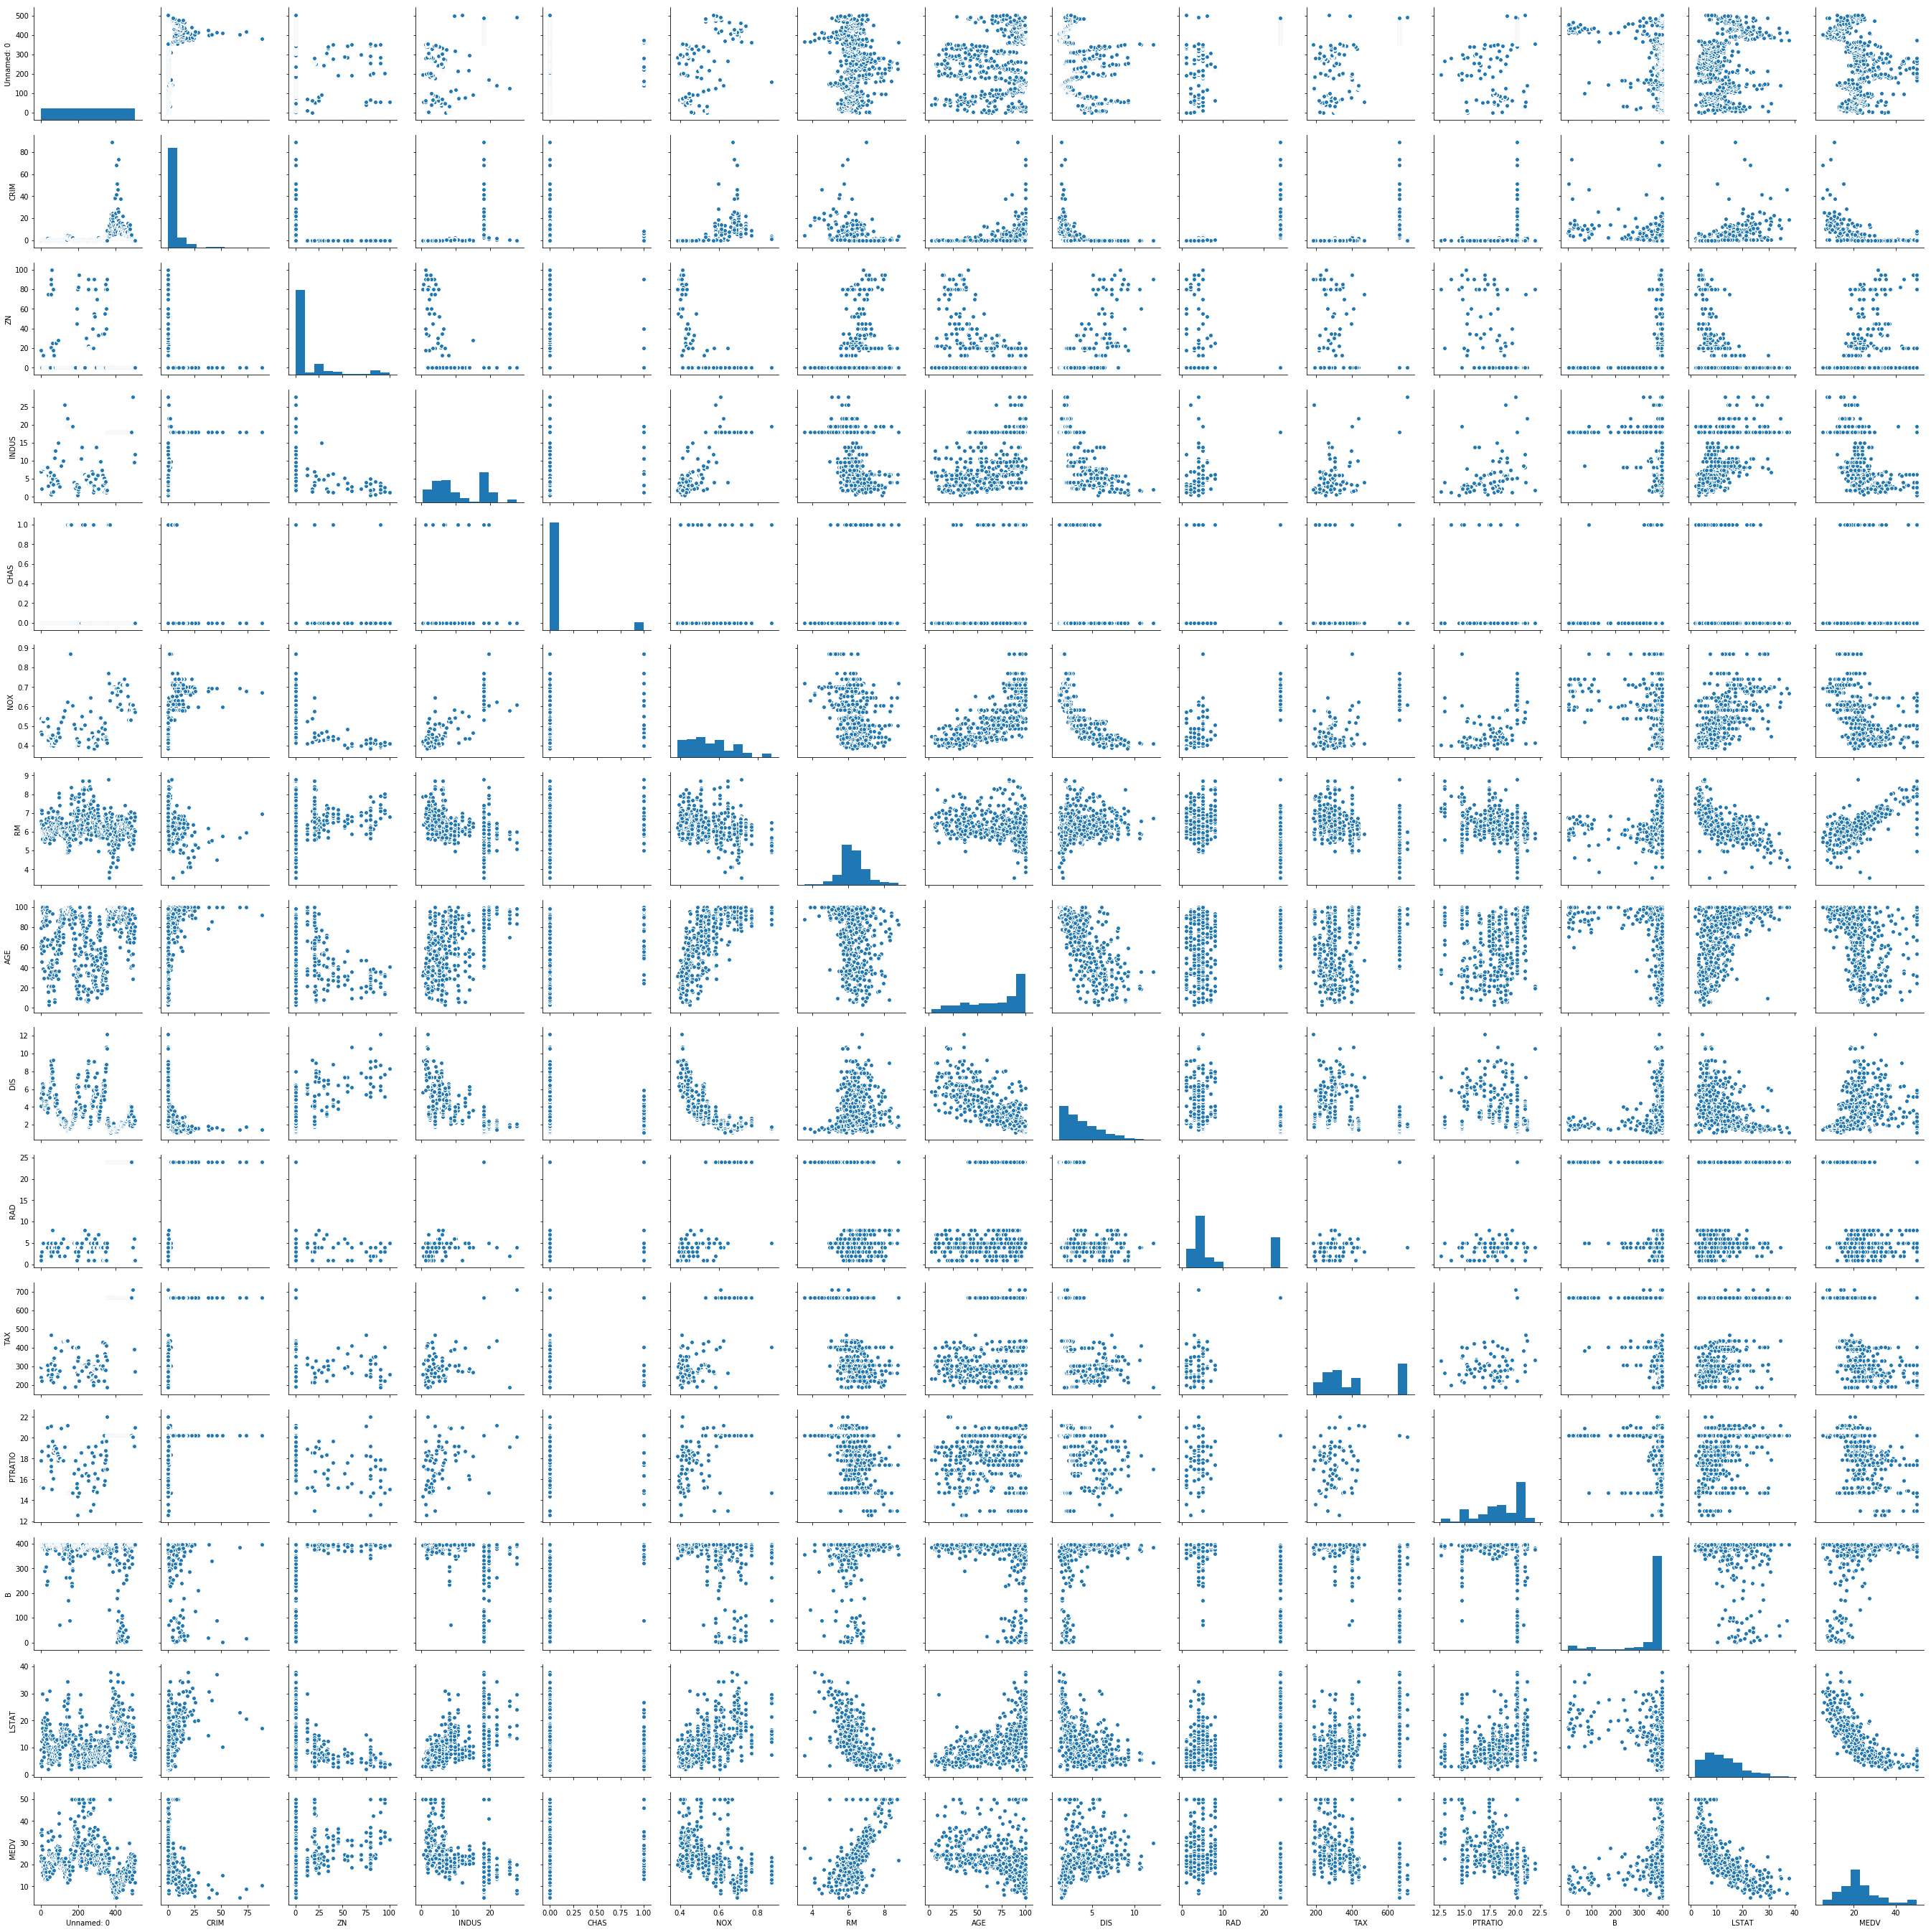

In [7]:
%matplotlib inline
import seaborn as sns
sns.pairplot(df)

### 3. For what two attributes does it make the *least* sense to calculate mean and median? Why?

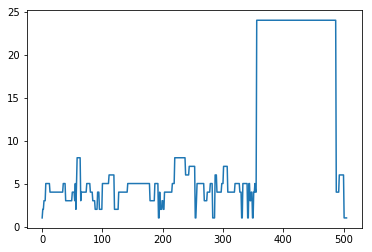

In [8]:
%matplotlib inline
df['RAD'].plot(kind='line')

CHAS is a dummy (categorical) variable that makes no sense quantitatively.

RAD is a variable that indexes the distance to highways. It has many low values and, after a large gap, has higher values. It stands to reason that this is not a "true" quantitative variable in the sense that the difference between RAD = 1 and RAD = 2 may not be the same as the difference between RAD = 2 and RAD = 3.




### 4. Which two variables have the strongest linear association? 

Report both variables, the metric you chose as the basis for your comparison, and the value of that metric. *(Hint: Make sure you consider only variables for which it makes sense to find a linear association.)*

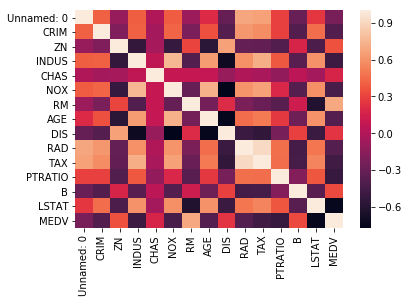

In [9]:
# A:
sns.heatmap(df.corr())

### 5. Look at distributional qualities of variables.

Answer the following questions:
1. Which variable has the most symmetric distribution? 
2. Which variable has the most left-skewed (negatively skewed) distribution? 
3. Which variable has the most right-skewed (positively skewed) distribution? 

Defend your method for determining this.

In [10]:
# A:
df.apply(lambda x: x.skew()).sort_values(ascending=False)

CRIM          5.223149
CHAS          3.405904
ZN            2.225666
MEDV          1.108098
DIS           1.011781
RAD           1.004815
LSTAT         0.906460
NOX           0.729308
TAX           0.669956
RM            0.403612
INDUS         0.295022
Unnamed: 0    0.000000
AGE          -0.598963
PTRATIO      -0.802325
B            -2.890374
dtype: float64

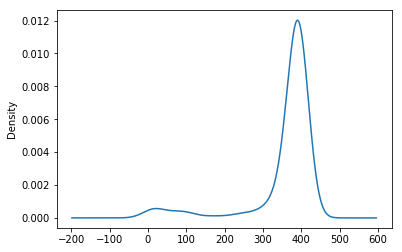

In [11]:
df['B'].plot(kind='density')

### 6. Univariate analysis of your choice

Conduct a full univariate analysis on MEDV, CHAS, TAX, and RAD. 

For each variable, you should answer the three questions generally asked in a univariate analysis using the most appropriate metrics.
- A measure of central tendency
- A measure of spread
- A description of the shape of the distribution (plot or metric based)

If you feel there is additional information that is relevant, include it. 

In [14]:
# A:
## Look at descriptive Statistics - see measures of central tendency (mean) and spread (std, interquartile range)
cols = ['MEDV', 'CHAS','TAX','RAD']
df[cols].describe()

,MEDV,CHAS,TAX,RAD
count,506.000000,506.000000,506.000000,506.000000
mean,22.532806,0.069170,408.237154,9.549407
std,9.197104,0.253994,168.537116,8.707259
min,5.000000,0.000000,187.000000,1.000000
25%,17.025000,0.000000,279.000000,4.000000
50%,21.200000,0.000000,330.000000,5.000000
75%,25.000000,0.000000,666.000000,24.000000
max,50.000000,1.000000,711.000000,24.000000


In [15]:
## Prepare for plotting
transformed_df = pd.melt(df[cols])
transformed_df.head()

,variable,value
0,MEDV,24.0
1,MEDV,21.6
2,MEDV,34.7
3,MEDV,33.4
4,MEDV,36.2


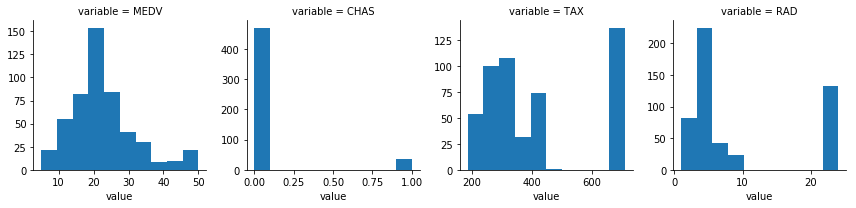

In [16]:
import matplotlib.pyplot as plt
g = sns.FacetGrid(transformed_df, col='variable', sharex = False, sharey = False)
g.map(plt.hist, 'value')

### 7. Reducing the number of observations

It seems likely that this data is a census - that is, the data set includes the entire target population. Suppose that the 506 observations was too much for our computer (as unlikely as this might be) and we needed to pare this down to fewer observations. 

**Use the `df.sample()` or `df.sample_frac()` function to select 50 observations from `'AGE'`.**

In [20]:
# A:

## sampling whole dataframe, not just age
sampled_df = df.sample(100)
sampled_df.shape

(100, 15)

In [21]:
sampled_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
80,80,0.04113,25.0,4.86,0,0.426,6.727,33.5,5.4007,4,281.0,19.0,396.90,5.29,28.0
285,285,0.01096,55.0,2.25,0,0.389,6.453,31.9,7.3073,1,300.0,15.3,394.72,8.23,22.0
137,137,0.35233,0.0,21.89,0,0.624,6.454,98.4,1.8498,4,437.0,21.2,394.08,14.59,17.1
114,114,0.14231,0.0,10.01,0,0.547,6.254,84.2,2.2565,6,432.0,17.8,388.74,10.45,18.5
68,68,0.13554,12.5,6.07,0,0.409,5.594,36.8,6.4980,4,345.0,18.9,396.90,13.09,17.4


**Notice that the row numbers are different! This is a result of the random sampling**

In [22]:
# Age

sample_ages = df['AGE'].sample(50)
sample_ages

337     59.6
118     73.1
485     51.9
356     97.4
15      56.5
298     20.1
345     48.5
248     49.1
196     34.1
132     97.9
151    100.0
270     42.1
363     89.0
111     81.6
483     40.3
214      9.8
338     37.3
475     97.4
231     76.9
410    100.0
62      67.8
315     77.7
362     96.2
240     54.3
347     27.7
269     61.5
165     93.0
169     95.2
484     41.9
161     90.8
74       6.0
51      63.0
415    100.0
256     34.2
178     74.4
324     40.1
358     83.4
384     91.2
355     19.5
305     58.1
259    100.0
330     32.2
488     92.7
421     95.3
441     97.2
301     40.4
308     82.5
314     87.3
381     99.1
2       61.1
Name: AGE, dtype: float64